# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [11]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [12]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [13]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Chuck', 'Alice', 'Bob']

Here's how we add edges between nodes.

In [14]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Alice', 'Chuck'), ('Alice', 'Bob'), ('Bob', 'Chuck'), ('Bob', 'Alice')]

And here's how to draw the graph.

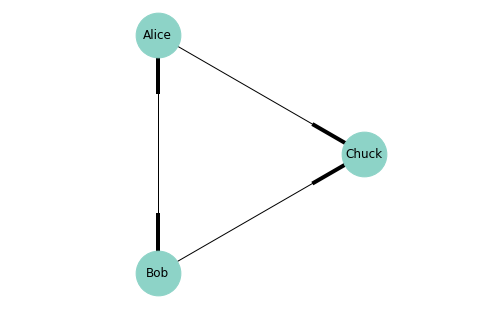

In [15]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

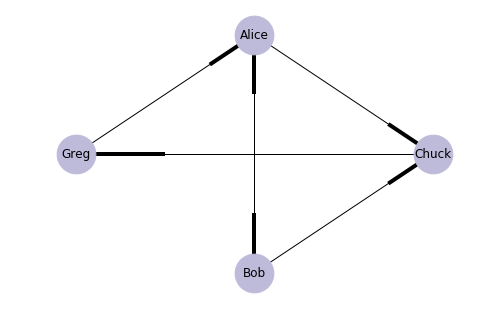

In [16]:
# Solution goes here
G.add_node('Greg')
G.add_edge('Greg', 'Alice')
G.add_edge('Chuck', 'Greg')
nx.draw_circular(G,
                node_color=COLORS[2],
                node_size=1500,
                with_labels=True)

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [17]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [18]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Philly', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [19]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [20]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Albany'), ('NYC', 'Philly'), ('NYC', 'Boston'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

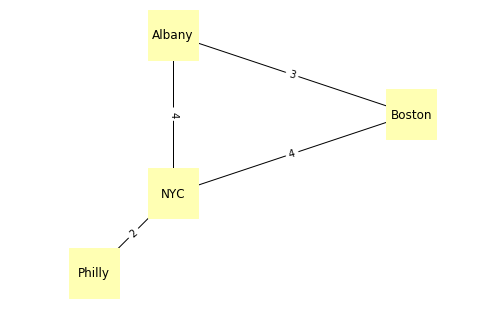

In [21]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

{('Albany', 'Boston'): <matplotlib.text.Text at 0x7f907daf6630>,
 ('Albany', 'NYC'): <matplotlib.text.Text at 0x7f907dafb5c0>,
 ('Boston', 'NYC'): <matplotlib.text.Text at 0x7f907daea630>,
 ('Boston', 'Providence'): <matplotlib.text.Text at 0x7f907dafbd68>,
 ('NYC', 'Philly'): <matplotlib.text.Text at 0x7f907daf6dd8>}

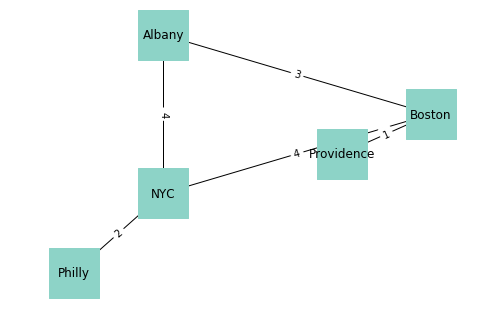

In [22]:
loc = nx.Graph()
pos['Providence']=(-72,41.5)
drive_times[('Boston','Providence')]=1
loc.add_nodes_from(pos)
loc.add_edges_from(drive_times)
nx.draw(loc, pos,
       node_color=COLORS[0],
       node_shape='s',
       node_size=2500,
       with_labels=True)
nx.draw_networkx_edge_labels(loc, pos, edge_labels=drive_times)

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [23]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [24]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [25]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

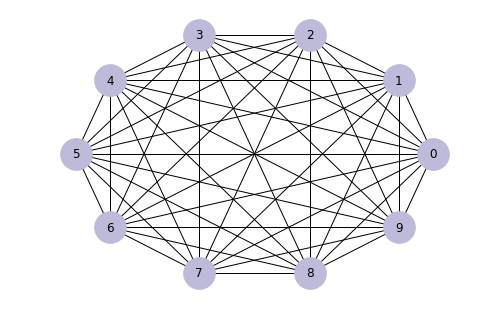

In [26]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [27]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

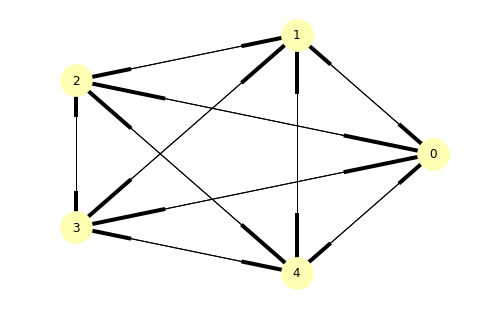

In [28]:
def all_pairs_direct(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u,v

def make_complete_graph_directed(n):
    comp = nx.DiGraph()
    nodes = range(n)
    comp.add_nodes_from(nodes)
    comp.add_edges_from(all_pairs_direct(nodes))
    return comp

comp_graph = make_complete_graph_directed(5)
nx.draw_circular(comp_graph,
                node_color=COLORS[1],
                node_size=1000,
                with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [29]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [30]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [31]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [32]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

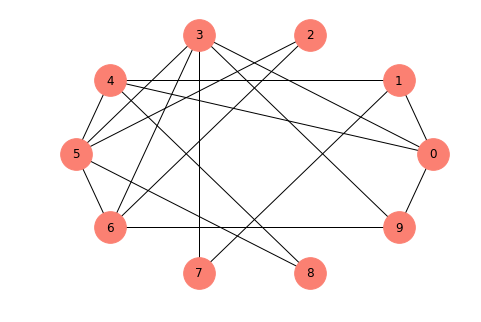

In [33]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [34]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [35]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [36]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [37]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [38]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [39]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [40]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

False


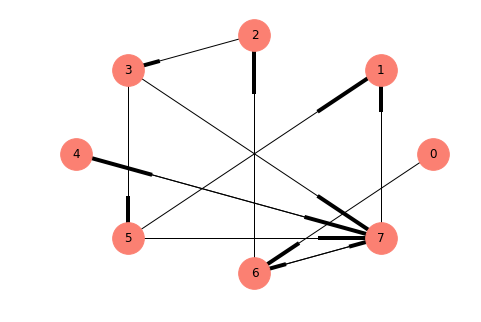

In [41]:
# Makes random pairs of directed edges between nodes
def random_pairs_dir(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j and flip(p): # This is different from undirected graphs because the edges can go both ways
                yield u, v
                
# Makes a directed random graph                
def make_random_graph_dir(n, p):
    G = nx.DiGraph()
    nodes = range(n)
    edges = random_pairs_dir(nodes, p)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

"""
Strong connectivity in a directed graph means that every node must be reachable from every other node.
Thus, instead of starting from an arbitrary node, we must check the path from every single node.
"""
def is_connected_strong(G):
    for start_node in G.nodes_iter(): # Iterate through every node of the graph
        seen = set()
        stack = [start_node]
        while stack:
            node = stack.pop()
            if node not in seen:
                seen.add(node)
                stack.extend(G.neighbors(node))
        if len(seen) != len(G): # If this given node isn't capable of reaching all other nodes
            return False
    return True # If we iterate through every node and it's 
    

test = make_random_graph_dir(8, .3)
print(is_connected_strong(test))

nx.draw_circular(test, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
    
    

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [42]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [43]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6565

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [44]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [45]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [46]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.001
0.123026877081 0.02
0.165958690744 0.092
0.223872113857 0.332
0.30199517204 0.674
0.407380277804 0.907
0.549540873858 0.995
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

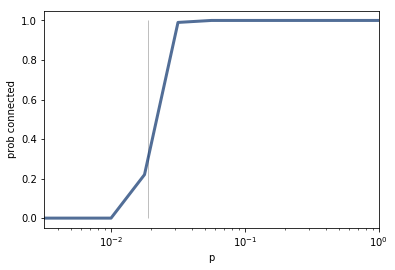

In [51]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

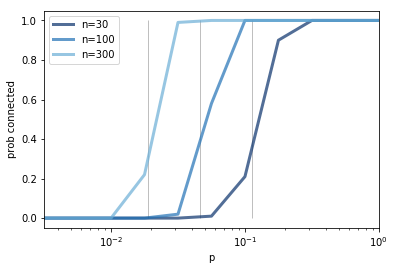

In [48]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

**Answer**   
There are three operations going on in this function. The `len` function calls should not affect the performance of the function, since `len` is a constant-time operation. The `next` call itself should be constant time, since it's only returning a single element. We know that `reachable_nodes` is $O(n+m)$, and we're adding to the runtime of the function since the body of `nodes_iter` is essentially being run every loop of `reachable_nodes` as that's how generators work. But, because that's only adding $n$ function calls, it's only changing the order of growth to $O(2n+m)$, which is the same as $O(n+m)$, so it's still linear.

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [65]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend([neigh for neigh in G.neighbors(node) if neigh not in seen])
    return seen



In [56]:
complete = make_complete_graph(1000)
reachable_nodes_precheck(complete, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
%timeit len(reachable_nodes(complete, 0))

10 loops, best of 3: 94.4 ms per loop


In [66]:
%timeit len(reachable_nodes_precheck(complete, 0))

10 loops, best of 3: 89.3 ms per loop


We do get somewhat of a performance upgrade from this updated version, although it isn't upser noticeable, probably because it still has to iterate through G.neighbors in each cycle of the loop. Still, we get some benefit from not continually adding and removing nodes to `stack`.

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [72]:
from random import sample
def m_pairs(nodes, m):
    potential_pairs = all_pairs(nodes) # Get iterator that will return alll pairs
    selected_pairs = sample(list(potential_pairs), m) # Convert iterator to list and get a random sample from it
    return selected_pairs

/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.4/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


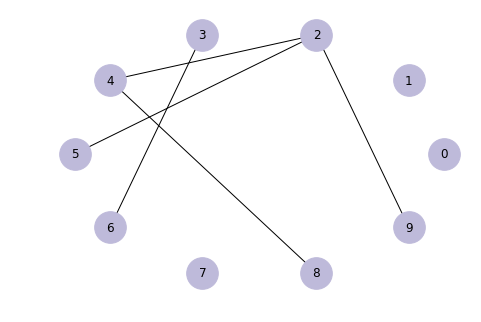

In [73]:
def make_m_graph(n, m):
    G = nx.Graph()
    G.add_nodes_from(range(n)) 
    G.add_edges_from(m_pairs(G.nodes(), m)) # Add random edges
    return G

graph = make_m_graph(10, 5) # Make a random 10-node graph with 5 edges.
nx.draw_circular(graph, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

In [69]:
def prob_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

0.321887582487
0.298626578205
0.277987164151


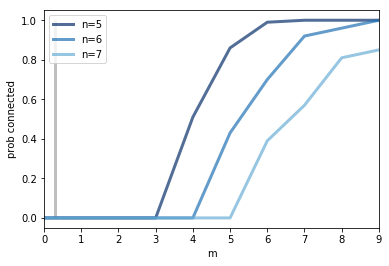

In [78]:
ns = [5, 6, 7]
ps = range(10)

thinkplot.preplot(len(ns))
for n in ns:

    pstar = np.log(n) / n
    print(pstar)
    thinkplot.vlines([pstar], 0, 1, color='gray')
    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='m', ylabel='prob connected',
                  xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As can be seen from the graph, once $m$ reaches the maximum number of edges possible in a given graph, it maxes out at a probability of 1. Note, however, that the calculated inflection points are no longer accurate, since we aren't using probabilities, and the connectivity curve in general looks quite different. Each graph must have at least $n-1$ edges in order to have any chance of connectivity, so below that every graph's connectivity is 0. 